<a href="https://colab.research.google.com/github/BrunoCapron/ESQ724-fundamentos_aprendizado_maquina/blob/main/Aprendizado_Nao_Supervisionado/PCA/PCA_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PCA para compressão de arquivos

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys() #lista o que o conjunto de dados contém

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
mnist['DESCR'] #descripção do conjunto de imagens

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

Vamos dar uma olhada nos dados e criar o conjunto de dados

In [6]:
import pandas as pd

#Criamos o conjunto de dados de treino

X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


Tem 70000 imagens, e cada imagem tem 784 atributos: cada imagem tem 28*28 = 784 pixels, e cada atributo representa a intensidade de um pixel.
Vamos olhar para uma imagem do conjunto:

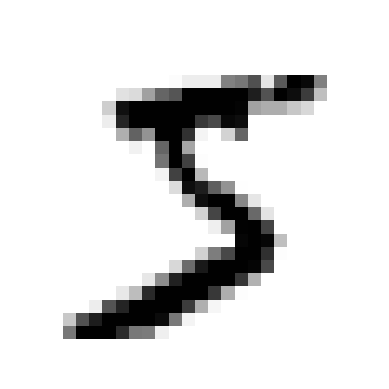

In [7]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

Parece um 5. Verifiquemos isso:

In [8]:
y[0]

'5'

In [9]:
import numpy as np

y = y.astype(np.uint8)
y[0]

np.uint8(5)

Criemos os conjuntos de treinamento e de teste:

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


Implementamos o PCA

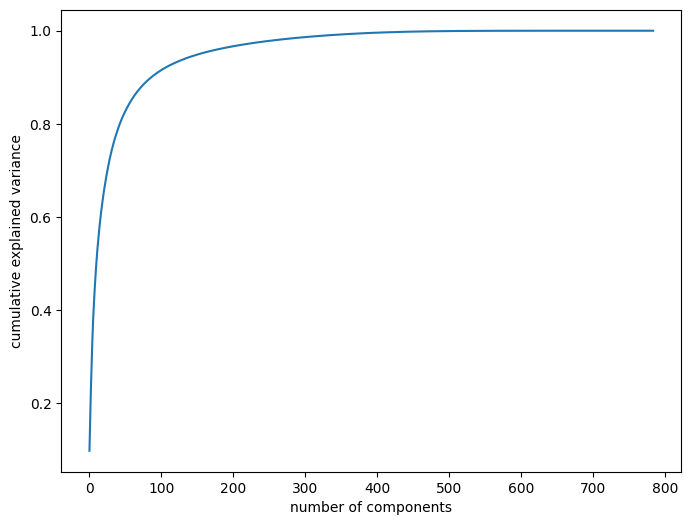

154


In [13]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,6))
plt.plot(cumsum)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#determinamos o número mínimo de componentes principais explicando 95% de variância
d = np.argmax(cumsum >= 0.95) + 1
print(d)





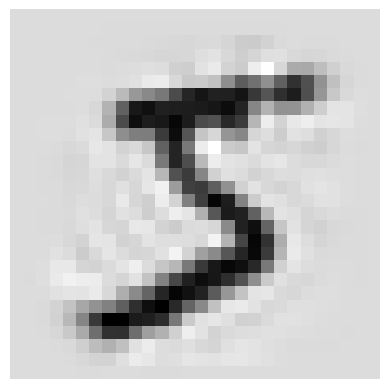

In [18]:
#projetamos o conjunto de dados no espaço formado pelos 154 componentes principais
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)

#a decompressão para 784 dimensões é obtida atavés de pca.inverse_transform
X_recovered = pca.inverse_transform(X_reduced)

#plotamos o 5 obtido no começo do notebook para ver como ficou a imagem
some_digit = X_recovered[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()
